# Tweeter Sentiment analysis 

### Let's install the python client for the official Twitter API

In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


######  Let's install  textblob python library for processing textual data

In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


######  Let's  install some NLTK corpora 

In [3]:
import re #re library is a regualr expression that specifies a set of strings that matches it
import tweepy #tweepy library is a Python Library used for accesing Twitter API
from tweepy import OAuthHandler #OAuthHandler used for twitter to provide Twitter API to authenticate each request.
from textblob import TextBlob #textblob is an open source python library  used for processing textual data.
import matplotlib.pyplot as plt # Matplotlib used to plot data i.e., pie chart etc
from matplotlib import style #style used for graph plotting
import pandas as pd
import numpy as np



In [4]:
#authentication keys found on tweeter developper account
accessToken = "1353371185145405440-RFcjCV61tWceZC2V4m34AOiMdoYcki"
accessTokenSecret = "LRyiTnjYanpkersLgViCUylyIaM3AFVIt9JLQLy3OefJX"
consumerKey = "AiFv3DciTRjSHrIRjVEGIcQEQ"
consumerSecret = "XgczKyKjPBCfnComUyPEtyHuYYWxmXr9RmnXmvMq2GRcg1VcsL"

auth = tweepy.OAuthHandler(consumerKey,consumerSecret )
auth.set_access_token(accessToken,accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# Generic Twitter Class for sentiment analysis.
class TwitterClient(object):
         
     # Class constructor or initialization method.
    def __init__(self):
     #__init__ is a constructor method, constructor is called when an object is created
       
        
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'AiFv3DciTRjSHrIRjVEGIcQEQ'
        consumer_secret = 'XgczKyKjPBCfnComUyPEtyHuYYWxmXr9RmnXmvMq2GRcg1VcsL'
        access_token = '1353371185145405440-RFcjCV61tWceZC2V4m34AOiMdoYcki'
        access_token_secret = 'LRyiTnjYanpkersLgViCUylyIaM3AFVIt9JLQLy3OefJX'
  
        # attempt authentication
        try:
            print("try")
            # create OAuthHandler object
            self.auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth,wait_on_rate_limit=True)
        except:
            print("Error: Authentication Failed")
            
    # Utility function to clean tweet text by removing links, special characters
    def clean_tweet(self, tweet):
     
 # using simple regex statements to clean the text, remove any unnecessary punctuation before performing sentiment analysis.
   
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    # Utility function to classify sentiment of passed tweet using textblob's sentiment method
    def get_tweet_sentiment(self, tweet):

            # create TextBlob object of passed tweet text
            analysis = TextBlob(self.clean_tweet(tweet))
            # set sentiment
            #if the analysis of the text has a polarity greater than 0, that means the text is positive
            #if the analysis of the text has a polarity that is equal to 0 it means it is neutral
            #else if the analysis of the text has a polarity that is neither greater than 0 or equal to 0, 
            #meaning the polarity is less than 0, it means the text is negative.
            if analysis.sentiment.polarity > 0:
                return 'positive'
            elif analysis.sentiment.polarity == 0:
                return 'neutral'
            elif analysis.sentiment.polarity < 0:
                return 'negative'
        
    
        
            
    # Main function to fetch tweets and parse them.
    #count =100 , 100 is the default number of tweets to display 
    #if user has not entered number of tweets for sentiment analysis at main function
    def get_tweets(self, query, count = 100):

            # empty list to store parsed tweets
            tweets = []

            try:
                # call twitter api to fetch tweets
                fetched_tweets = self.api.search(q = query, count = count)

                # parsing tweets one by one
                for tweet in fetched_tweets:
                    # empty dictionary to store required params of a tweet
                    parsed_tweet = {}

                    # saving text of tweet
                    parsed_tweet['text'] = tweet.text
                    # saving sentiment of tweet
                    parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)

                    # appending parsed tweet to tweets list
                    if tweet.retweet_count > 0:
                        # if tweet has retweets, ensure that it is appended only once to avoid duplicates
                        if parsed_tweet not in tweets:
                            tweets.append(parsed_tweet)
                    else:
                        tweets.append(parsed_tweet)
                        
                # VIEW DATAFRAME USING PANDAS
                tweet_list = pd.DataFrame(tweets)
                print("Tweets from PANDAS: " + " ", (tweet_list))

                #PRINTING TWEETS TO ALLOW ME TO DISPLAY RESULTS IN CHARTS         
                
                # return parsed tweets
                return tweets

            except tweepy.TweepError as e:
                # print error (if any)
                print("Error : " + str(e))
                
     
    

In [6]:
def main(query, count = 100): 

    #count 100 is the default value for tweets when the user did not put the number of tweets to do sentiment analysis on 

    # creating object of TwitterClient Class 

    api = TwitterClient() 

    # calling function to get tweets 

    tweets = api.get_tweets(query, count) 

   

    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 

    # percentage of positive tweets 
    print("\nPositive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))    
    
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 

    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 

    
    neutweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral'] 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} %  ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))        
     
    
    # printing first 33 positive tweets 
    print("\nPositive tweets:")
    for tweet in ptweets[:33]: 
        print(tweet['text'])          
    
    print("\n-------------------------------------------------------------------") 
    
        #printing 33 neutral tweets
    print("\nNegative tweets:")
    for tweet in ntweets[:33]: 
        print(tweet['text']) 
    
    print("\n-------------------------------------------------------------------") # space between text
    
    # printing first 34 negative tweets 
    print("\nNeutral tweets:") 
    for tweet in neutweets[:34]: 
        print(tweet['text']) 
    
     
        
    print("\n----------------------------Sentiment Analysis Charts----------------------------------------------")
    # VIEW DATAFRAME USING PANDAS
    tweet_list = pd.DataFrame(tweets)
   
    
    #print("Tweets from PANDAS: " + " ", (tweet_list))
    #PRINTING TWEETS TO ALLOW ME TO DISPLAY RESULTS IN CHARTS
    #TRYOUT
    style.use('ggplot')#make grapgh look better
    plt.figure(figsize=(9,5)) 
    plt.title("Sentiment Analysis Tweets Chart", fontsize=10, fontweight="bold") #title of chart
    plt.plot(tweet_list["sentiment"], color = "green")
    plt.show()
    
    
    
 #===============================================================================================================   

    style.use('ggplot')#make grapgh look better
    plt.figure(figsize=(18,5)) 
    plt.title("Sentiment Analysis Tweets Chart", fontsize=10, fontweight="bold") #title of chart  
    #plotting histogram of positive, negative and neutral tweets, 
    #bins allows histogram numerical data to be plotted according to width, height depends on bin
    
    plt.hist(tweet_list["sentiment"], bins = 20, density =10,color = "purple") 
    plt.xlabel("Sentiment") #name of the x label
    plt.ylabel("percentage % of sentiment analysis tweet") #name of y label
    
    plt.show() #displays histogram
       
    #DISPLAY PERCENTAGE OF TWEETS TO HELP READER
    
    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 

    # percentage of positive tweets 
    print("\nPositive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))  
       
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 

    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 

    
    neutweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral'] 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} %  ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))
    
   
    #code below calculates weighted average of tweets for positive, negative and neutral sentiment

    ptw = 1 * (len(ptweets)) / (len(tweets)) #score of positive tweets
    #average of positive tweets is calculated by 1 * length of positive tweets divided by len of all tweets 'tweets'
    #1 is the score of a positive sentiment
    
    neutw = 0 * (len(neutweets)) / (len(tweets)) #score of neutral tweets 
    #average of neutral tweets is calculated by 1 * length of neutral tweets divided by len of all tweets 'tweets'
    #0 is the score of a neutral sentiment
    
    ntw = -1 * (len(ntweets)) / (len(tweets)) #score of negative tweets 
    #average of negative tweets is calculated by 1 * length of negative tweets divided by len of all tweets 'tweets'
    #1 is the score of a negative sentiment
    
    result = ptw + neutw + ntw #adds the positive, negative and neutral tweets to get average
     
    print("\n Weighted Average Results: ",round(result, 2))# rounds results to 2 decimal places
    
    #-------------------------------------------------------
    #CORRELATION CALCULATION
    #
    my_tweets = pd.DataFrame(tweets) # gets all tweets in dataframe
    countposi = 0
    countnega = 0
    countneut = 0
    print("\n\n\n my_tweets are: ", my_tweets)
    #the for loop statement will count and increment the number of tweets that are positive, negative and neutral
    for tweet in tweets[:100]: 
        print(tweet['sentiment'])
        if tweet['sentiment'] == 'positive':
            countposi = countposi +1
        elif tweet['sentiment'] == 'negative':
            countnega = countnega +1
        elif tweet['sentiment'] == 'neutral':
            countneut = countneut +1
      
    
    print("\n count for positive is: " + str(countposi))
    print("\n count for negative is: " + str(countnega)) 
    print("\n count for neutral is: " + str(countneut))
    
    all_tweet_all = countposi, countnega, countneut
    
    #countposi is the total count of positive tweets
    #countnega is the total count of negative tweets
    #countneut is the total count of neutral tweets

    df = pd.DataFrame(all_tweet_all)
    #performs correlation of all positive, negative and neutral tweet sentiment
    
    print("\n correlation is : ", df.corr())
    #df.corr() , Returns the correlation between columns in a data frame.
    #we are returning the correlation between the number of positive, negative and neutral tweets using pandas
    #Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe.


try
Tweets from PANDAS:                                                    text sentiment
0   RT @WizePenguin: Murdoch / LNP / MORRISON want...  positive
1   Murdoch / LNP / MORRISON wanted Covid-19 to RI...   neutral
2   RT @AndrewW66619812: “In the UK, managing COVI...   neutral
3   2020: Ethiopia was the "fastest growing econom...   neutral
4   “In the UK, managing COVID-19 is now an exerci...   neutral
5   Covid Variant\n\nUBI ECONOMIC FRAMEWORK\nA hea...  positive
6   RT @NewHumanist: The pandemic shone an extraor...  positive
7   The pandemic shone an extraordinary light on t...  positive
8   And you can order the book here https://t.co/6...   neutral
9   RT @Bigbird32392741: Andrews flags huge change...  positive
10  They affect all sectors of the economy - the h...  negative
11  The pandemic shone an extraordinary light on t...  positive
12  Andrews flags huge change to Covid-19 rules in...  positive
13  @nadhimzahawi The PM has put nearly 200,000 pe...  positive
14  The succes

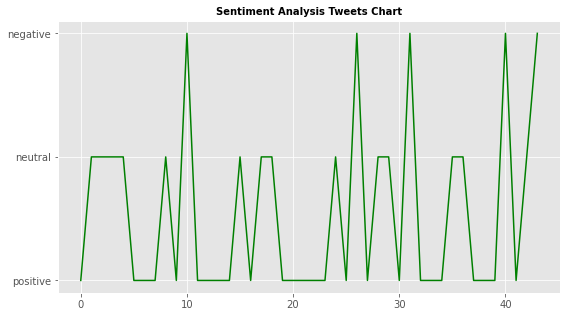

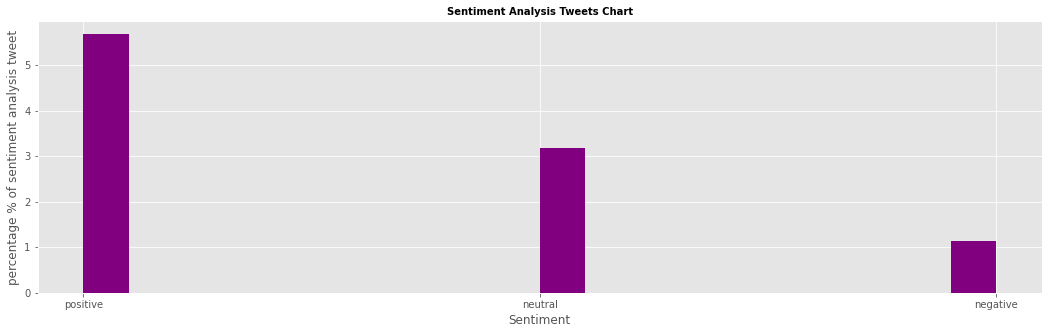


Positive tweets percentage: 56.81818181818182 %
Negative tweets percentage: 11.363636363636363 %
Neutral tweets percentage: 31.818181818181817 %  

 Weighted Average Results:  0.45



 my_tweets are:                                                   text sentiment
0   RT @WizePenguin: Murdoch / LNP / MORRISON want...  positive
1   Murdoch / LNP / MORRISON wanted Covid-19 to RI...   neutral
2   RT @AndrewW66619812: “In the UK, managing COVI...   neutral
3   2020: Ethiopia was the "fastest growing econom...   neutral
4   “In the UK, managing COVID-19 is now an exerci...   neutral
5   Covid Variant\n\nUBI ECONOMIC FRAMEWORK\nA hea...  positive
6   RT @NewHumanist: The pandemic shone an extraor...  positive
7   The pandemic shone an extraordinary light on t...  positive
8   And you can order the book here https://t.co/6...   neutral
9   RT @Bigbird32392741: Andrews flags huge change...  positive
10  They affect all sectors of the economy - the h...  negative
11  The pandemic shone an extr

In [8]:
main("economy covid-19 uk")

%%timeit -n 1 --> calculates average run time execution of code